<a href="https://colab.research.google.com/github/Somya-2003/Weather-Detection-System/blob/main/Weather_Detection_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_csv("/content/seattle-weather.csv")

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.shape

(1461, 6)

In [ ]:
data.weather.value_counts()

,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


In [ ]:
data.weather.nunique()

5

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Convert date to datetime format and extract useful features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Encode categorical data
le = LabelEncoder()
df['weather_encoded'] = le.fit_transform(df['weather'])

In [ ]:
# Select features and target
features = ['precipitation', 'temp_max', 'temp_min', 'wind', 'month', 'day']
target = 'weather_encoded'


In [ ]:
X = df[features]
y = df[target]


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.8395904436860068

Classification Report:
               precision    recall  f1-score   support

     drizzle       1.00      0.11      0.20         9
         fog       0.57      0.16      0.25        25
        rain       0.95      0.93      0.94       120
        snow       0.67      0.25      0.36         8
         sun       0.78      0.98      0.86       131

    accuracy                           0.84       293
   macro avg       0.79      0.48      0.52       293
weighted avg       0.83      0.84      0.81       293



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

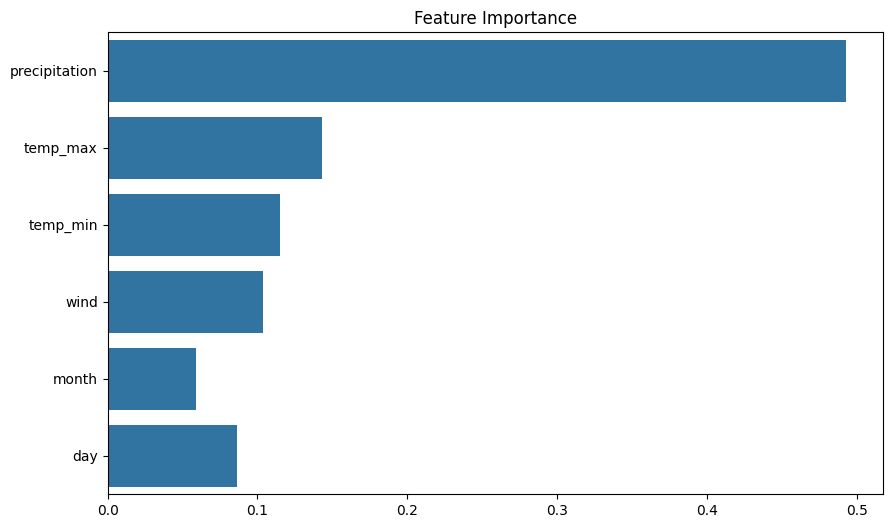

In [ ]:
# Feature importance
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.show()